In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Embedded Method

In [4]:
# Feature Selection Pipeline
def select_features_rf(df, asset_name="Asset"):
    """
    Performs feature selection using a Random Forest regressor to extract feature importances for a given asset's DataFrame.

    Required Features: All features of the asset and performs additional engineering (e.g., moving averages).
    Parameters:
        df (pd.DataFrame): The input DataFrame for the asset.
        asset_name (str): Identifier for plotting and output.

    Returns:
        feat_importances (pd.Series): Feature importances sorted in descending order.
    """
    # 1. Preprocessing and Feature Engineering
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date').reset_index(drop=True)

    # Add indicators that improve models to predict better (e.g., 5-day and 10-day moving averages)
    
    # df['MA_5'] = df['Close'].rolling(window=5, min_periods=1).mean()
    # df['MA_10'] = df['Close'].rolling(window=10, min_periods=1).mean()
    df['MA_20'] = df['Close'].rolling(window=20, min_periods=1).mean()
    df['MA_50'] = df['Close'].rolling(window=50, min_periods=1).mean()
    df['52W_High'] = df['High'].rolling(window=252, min_periods=1).max()
    df['52W_Low'] = df['Low'].rolling(window=252, min_periods=1).min()

    # Define feature columns and target variable
    features = [col for col in df.columns if col not in ['Date', 'Close', 'Series']]
    target = 'Close'

    new_df = df.dropna()
    X = new_df[features]
    y = new_df[target]


    # 2. Train a Random Forest Regressor
    rf = RandomForestRegressor(n_estimators=100, random_state=123)
    rf.fit(X, y)


    # 3. Extract and Plot Feature Importances
    importances = rf.feature_importances_
    feat_importances = pd.Series(importances, index=features).sort_values(ascending=False)

    print(f"\n{asset_name} - Feature Importances:")
    print(feat_importances)


    # 4. Plot feature importances as a bar chart
    plt.figure(figsize=(12, 6))
    ax = feat_importances.plot(kind='bar', title=f'Feature Importances - {asset_name}')
    plt.ylabel('Importance Score')
    plt.xticks(rotation=90)

    # Add rounded importance values as labels on bars
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=8, fontweight='bold')
    plt.tight_layout()
    plt.show()



    return feat_importances

### Feature Selection for Indexes

### Feature Selection for Each Index ###

Processing Index: NSEI

Index: NSEI - Feature Importances:
High                       0.280756
Low                        0.279231
MA_20                      0.171410
52W_High                   0.132950
Open                       0.111227
MA_50                      0.024348
52W_Low                    0.000049
Percent_Change_In_Price    0.000024
Volume                     0.000004
Dividends                  0.000000
Stock_Splits               0.000000
dtype: float64


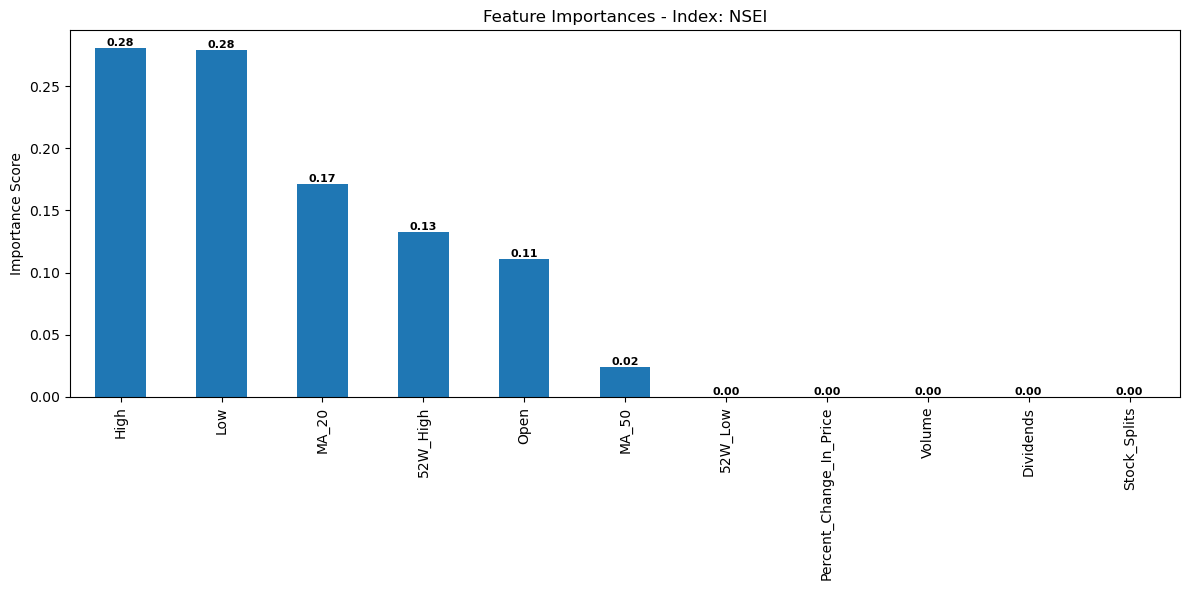


Processing Index: NSEBANK

Index: NSEBANK - Feature Importances:
Low                        0.524863
High                       0.459884
Open                       0.012826
52W_High                   0.001218
MA_20                      0.000612
MA_50                      0.000555
Percent_Change_In_Price    0.000036
Volume                     0.000005
52W_Low                    0.000002
Dividends                  0.000000
Stock_Splits               0.000000
dtype: float64


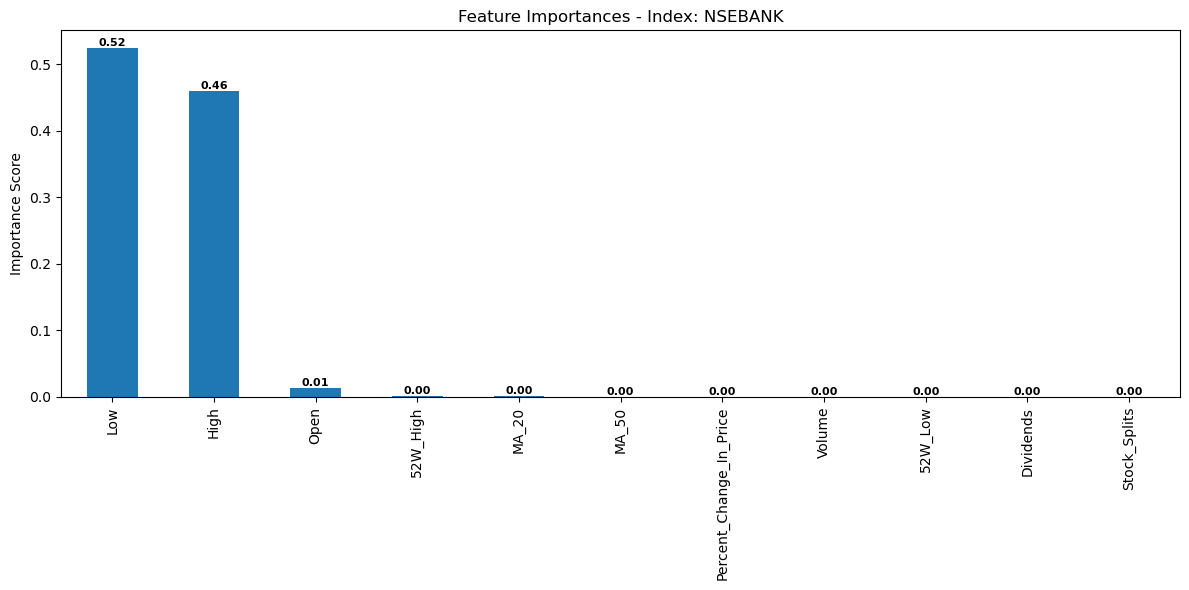


Processing Index: CNXIT

Index: CNXIT - Feature Importances:
Low                        0.258862
High                       0.222706
MA_50                      0.158429
MA_20                      0.141642
Open                       0.126276
52W_High                   0.092046
Percent_Change_In_Price    0.000028
52W_Low                    0.000007
Volume                     0.000004
Dividends                  0.000000
Stock_Splits               0.000000
dtype: float64


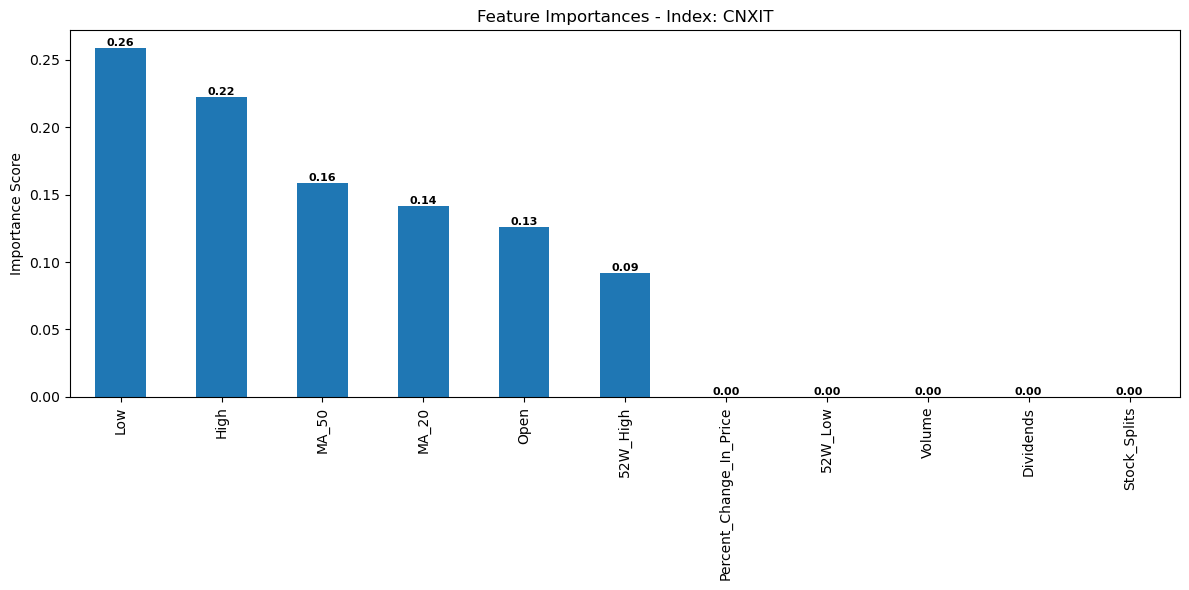


Processing Index: BSESN

Index: BSESN - Feature Importances:
High                       0.685809
Low                        0.292905
Open                       0.008793
52W_High                   0.008513
MA_50                      0.002115
MA_20                      0.001726
52W_Low                    0.000124
Percent_Change_In_Price    0.000012
Volume                     0.000002
Dividends                  0.000000
Stock_Splits               0.000000
dtype: float64


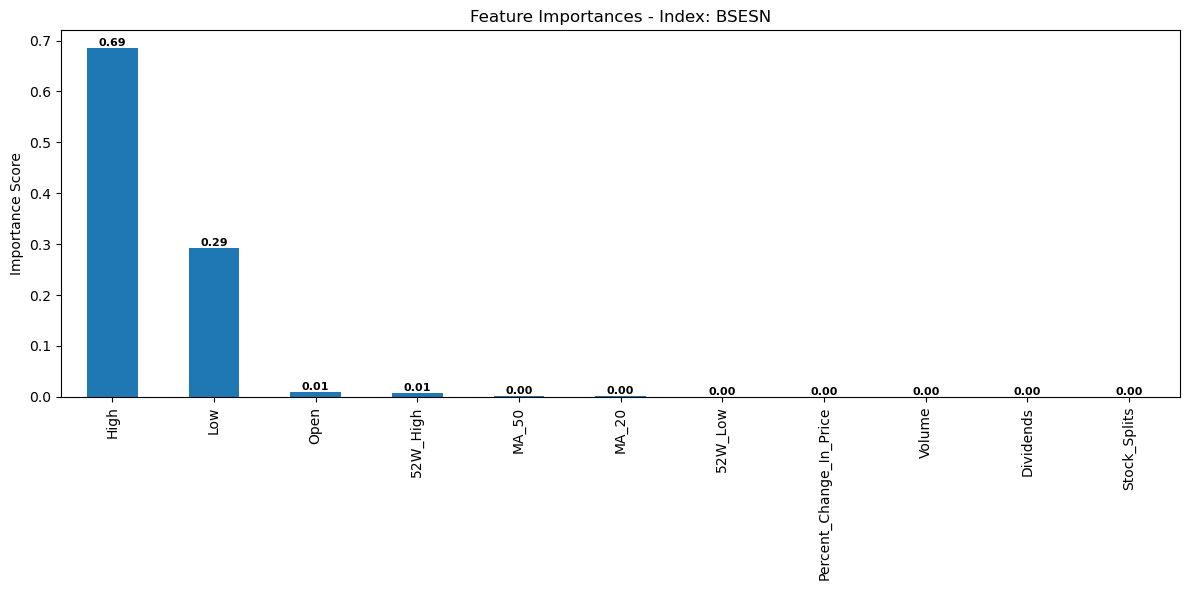


Processing Index: NIFTY_MIDCAP_100

Index: NIFTY_MIDCAP_100 - Feature Importances:
Low                        5.166743e-01
High                       2.471340e-01
MA_20                      7.367396e-02
MA_50                      6.527102e-02
Open                       5.585939e-02
52W_High                   4.134271e-02
52W_Low                    2.684706e-05
Percent_Change_In_Price    1.774797e-05
Volume                     8.656680e-08
Dividends                  0.000000e+00
Stock_Splits               0.000000e+00
dtype: float64


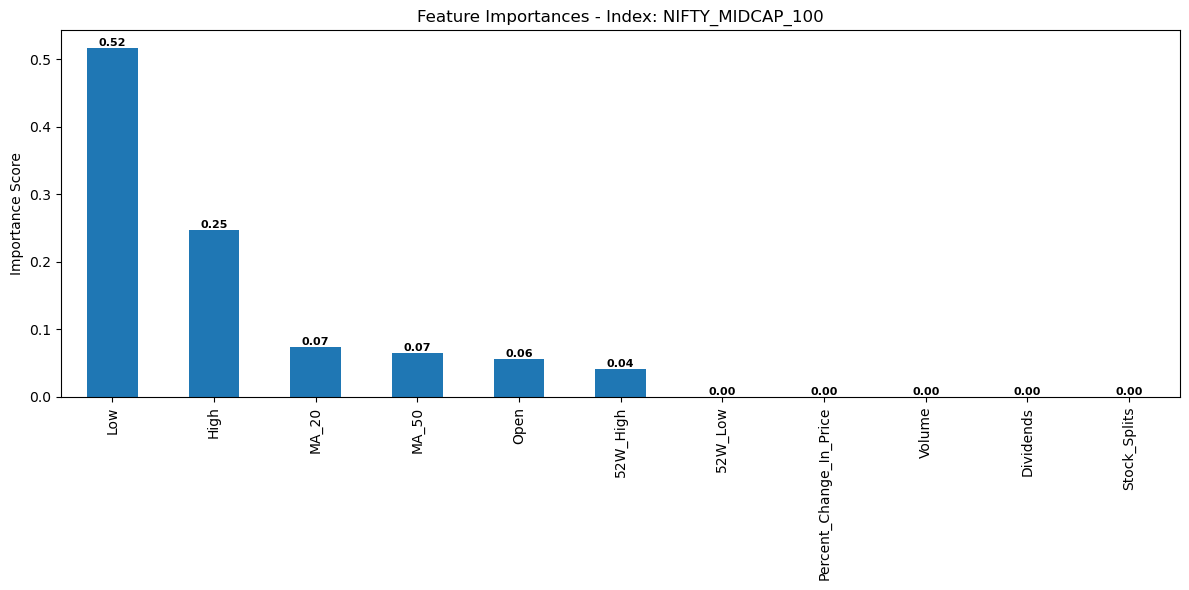


Processing Index: CNXPSUBANK

Index: CNXPSUBANK - Feature Importances:
High                       0.407557
Low                        0.393635
MA_50                      0.060765
Open                       0.048828
MA_20                      0.047757
52W_High                   0.041121
Percent_Change_In_Price    0.000288
Volume                     0.000038
52W_Low                    0.000014
Dividends                  0.000000
Stock_Splits               0.000000
dtype: float64


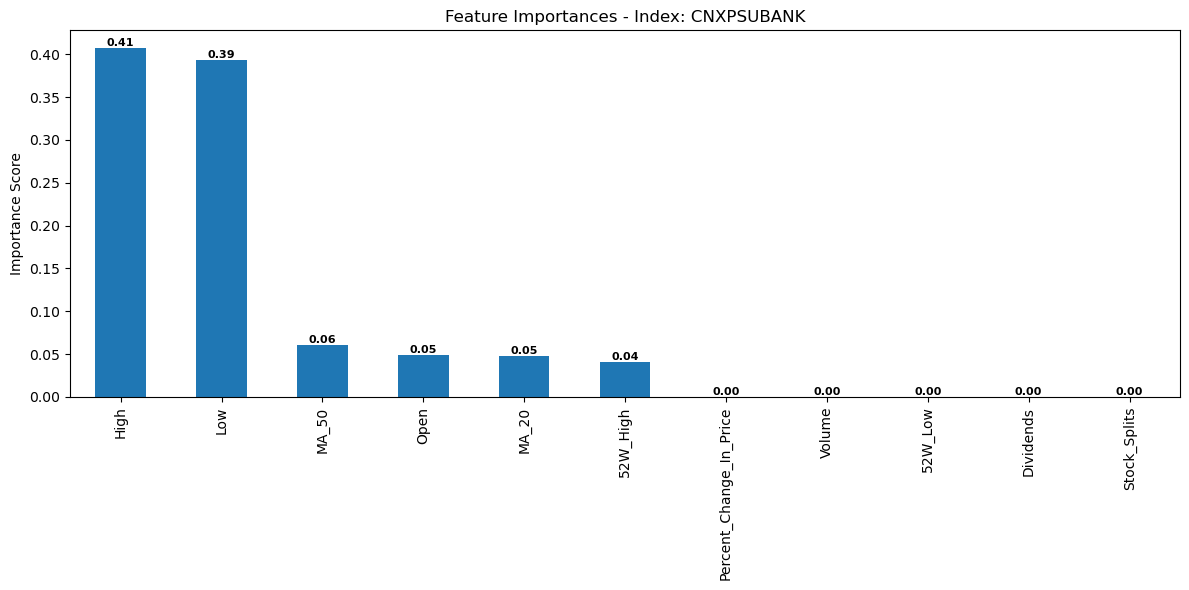


Processing Index: CNXAUTO

Index: CNXAUTO - Feature Importances:
High                       0.353599
Low                        0.253740
MA_20                      0.105379
MA_50                      0.100043
Open                       0.092988
52W_High                   0.060156
52W_Low                    0.034037
Percent_Change_In_Price    0.000049
Volume                     0.000010
Dividends                  0.000000
Stock_Splits               0.000000
dtype: float64


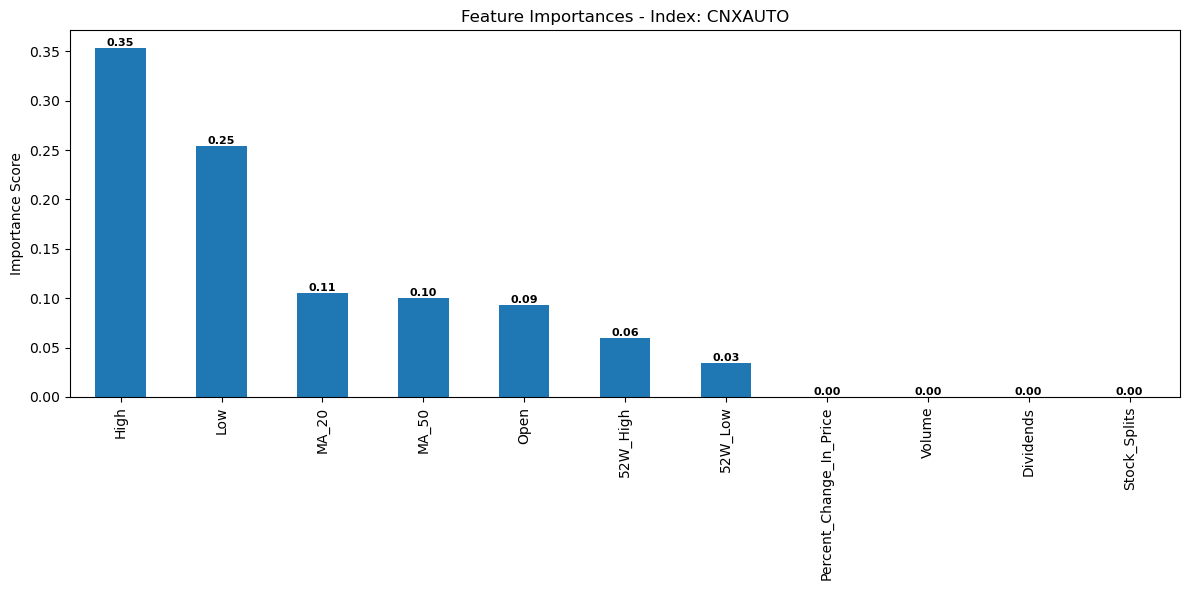


Processing Index: NIFTY_FIN_SERVICE

Index: NIFTY_FIN_SERVICE - Feature Importances:
Low                        0.543552
High                       0.344980
Open                       0.107297
52W_High                   0.003336
MA_50                      0.000413
MA_20                      0.000377
Percent_Change_In_Price    0.000035
Volume                     0.000007
52W_Low                    0.000004
Dividends                  0.000000
Stock_Splits               0.000000
dtype: float64


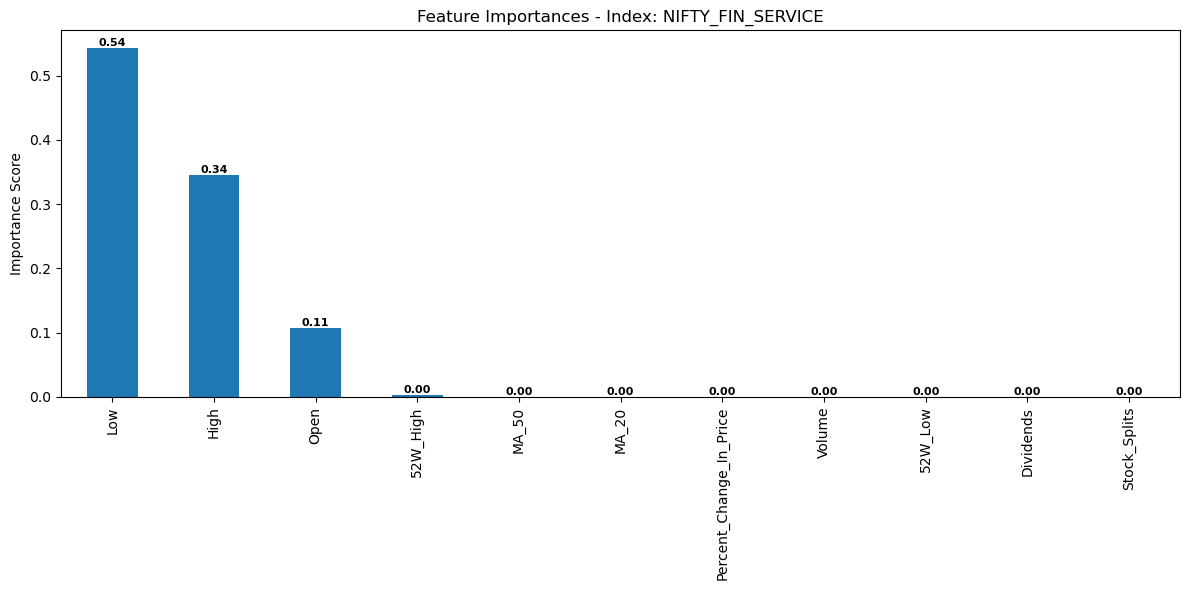

Low                        0.543552
High                       0.344980
Open                       0.107297
52W_High                   0.003336
MA_50                      0.000413
MA_20                      0.000377
Percent_Change_In_Price    0.000035
Volume                     0.000007
52W_Low                    0.000004
Dividends                  0.000000
Stock_Splits               0.000000
dtype: float64

In [5]:
index_excel_file = '../Data/Index_Data.xlsx'
all_indexes = pd.read_excel(index_excel_file, sheet_name=None)

print("### Feature Selection for Each Index ###")
for sheet_name, df in all_indexes.items():
    asset_identifier = f"Index: {sheet_name}"
    print(f"\nProcessing {asset_identifier}")
    feat_imp = select_features_rf(df, asset_name=asset_identifier)
    
feat_imp

### Feature Selection for Mutual Funds

### Feature Selection for Each Mutual Fund ###

Processing Mutual Fund: 0P00005WL6

Mutual Fund: 0P00005WL6 - Feature Importances:
Open                       0.344178
High                       0.300487
Low                        0.279051
MA_50                      0.039063
52W_High                   0.024768
MA_20                      0.012398
52W_Low                    0.000052
Percent_Change_In_Price    0.000003
Volume                     0.000000
Dividends                  0.000000
Stock_Splits               0.000000
Capital_Gains              0.000000
dtype: float64


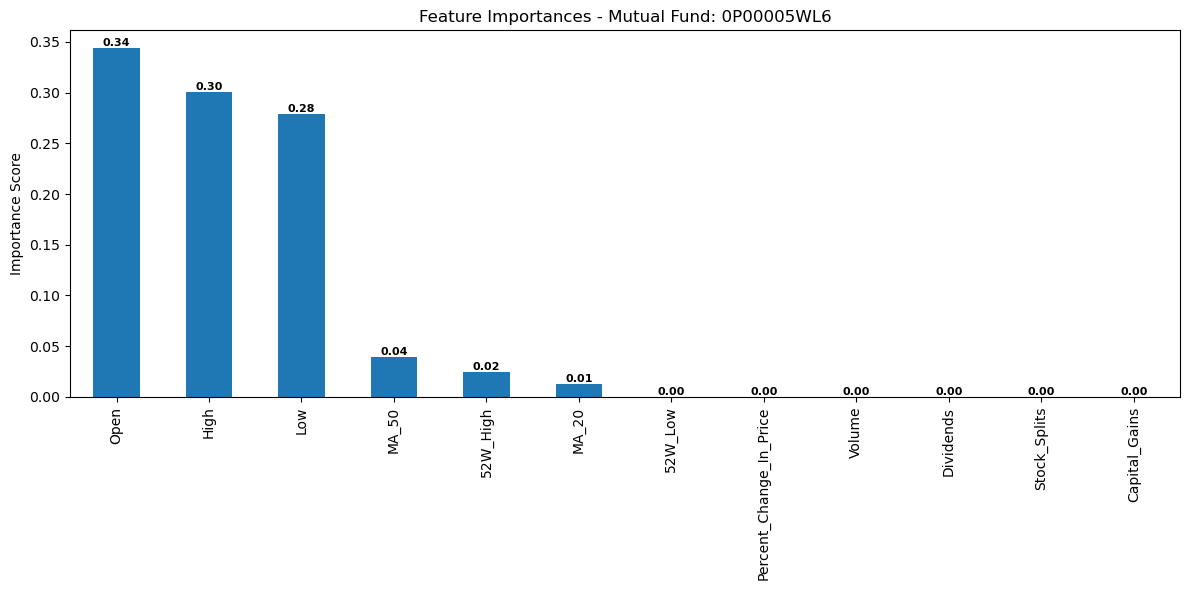


Processing Mutual Fund: UTINEXT50

Mutual Fund: UTINEXT50 - Feature Importances:
Open                       0.349563
High                       0.321645
Low                        0.250364
52W_High                   0.023762
MA_20                      0.016921
52W_Low                    0.014272
Volume                     0.013770
MA_50                      0.009442
Percent_Change_In_Price    0.000261
Dividends                  0.000000
Stock_Splits               0.000000
dtype: float64


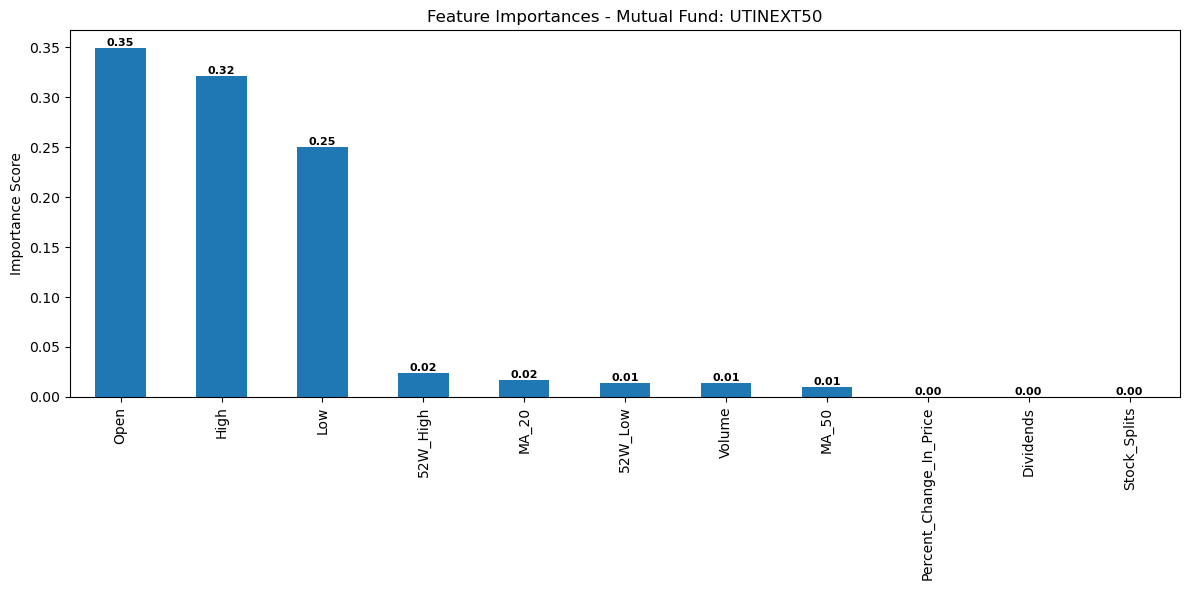


Processing Mutual Fund: 0P0000MLHH

Mutual Fund: 0P0000MLHH - Feature Importances:
Open                       3.678108e-01
High                       3.190604e-01
Low                        2.909183e-01
52W_High                   1.133557e-02
MA_20                      9.116022e-03
MA_50                      1.753942e-03
Percent_Change_In_Price    4.028437e-06
52W_Low                    9.784889e-07
Volume                     0.000000e+00
Dividends                  0.000000e+00
Stock_Splits               0.000000e+00
Capital_Gains              0.000000e+00
dtype: float64


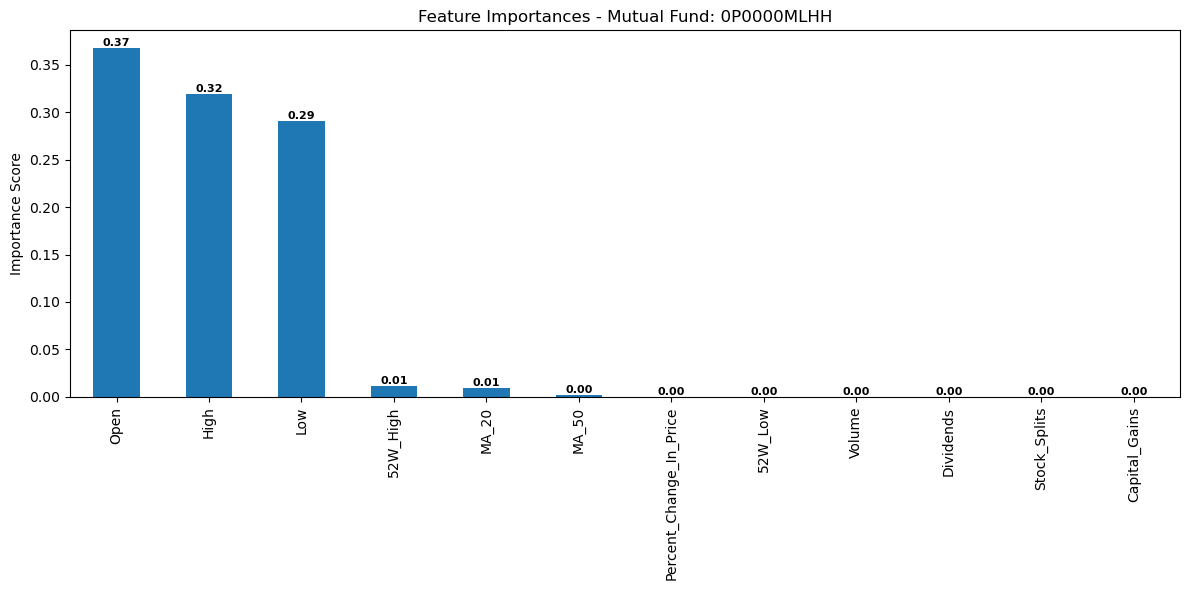


Processing Mutual Fund: 0P0000KV39

Mutual Fund: 0P0000KV39 - Feature Importances:
Open                       0.338558
High                       0.312777
Low                        0.280068
52W_High                   0.034442
MA_50                      0.024830
MA_20                      0.009178
52W_Low                    0.000145
Percent_Change_In_Price    0.000002
Volume                     0.000000
Dividends                  0.000000
Stock_Splits               0.000000
Capital_Gains              0.000000
dtype: float64


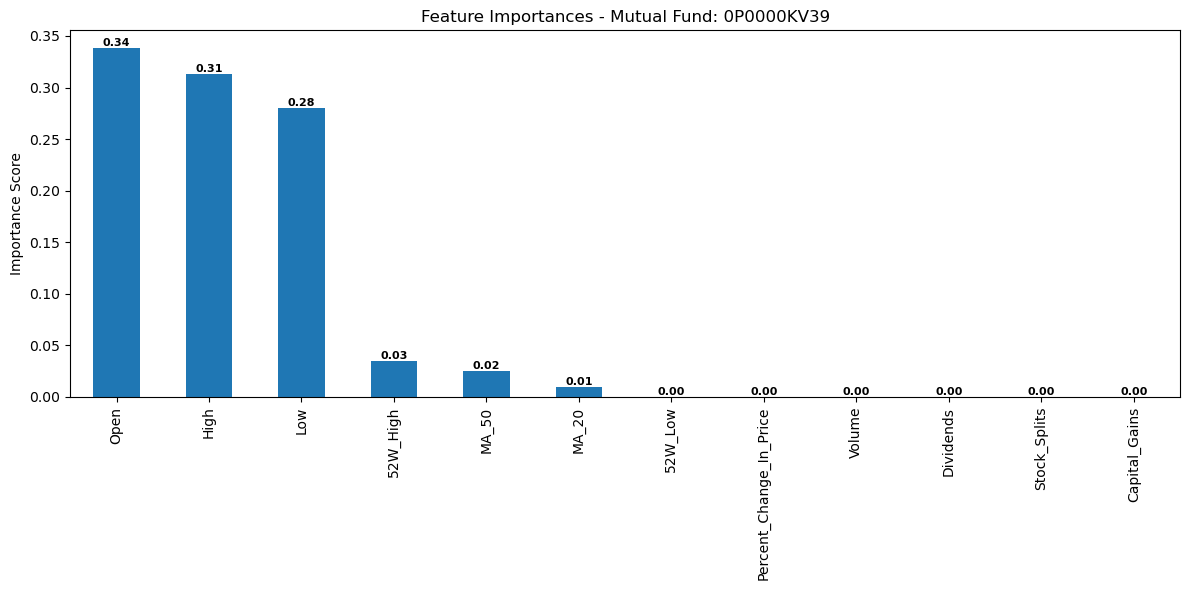


Processing Mutual Fund: 0P00009J3K

Mutual Fund: 0P00009J3K - Feature Importances:
High                       0.222045
Open                       0.216776
Low                        0.191142
52W_High                   0.168980
MA_20                      0.122848
MA_50                      0.078174
52W_Low                    0.000032
Percent_Change_In_Price    0.000003
Volume                     0.000000
Dividends                  0.000000
Stock_Splits               0.000000
Capital_Gains              0.000000
dtype: float64


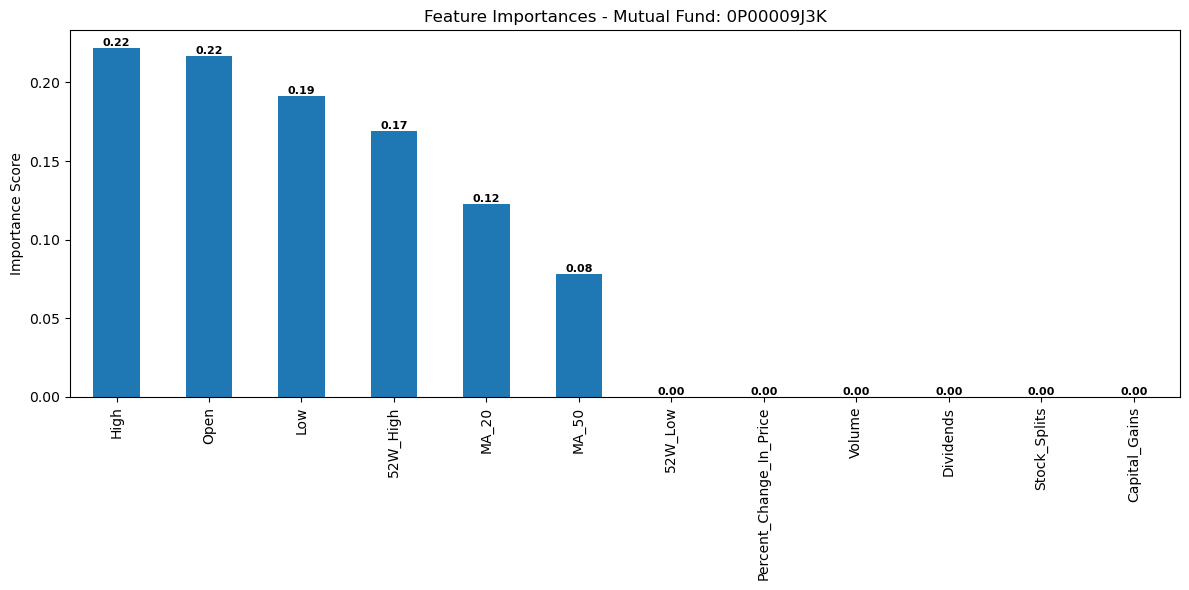


Processing Mutual Fund: 0P0001BAB5

Mutual Fund: 0P0001BAB5 - Feature Importances:
Open                       3.067760e-01
Low                        3.012032e-01
High                       2.848333e-01
MA_50                      3.856682e-02
52W_High                   3.389061e-02
MA_20                      3.292837e-02
52W_Low                    1.797941e-03
Percent_Change_In_Price    3.443703e-06
Dividends                  2.693714e-07
Volume                     0.000000e+00
Stock_Splits               0.000000e+00
Capital_Gains              0.000000e+00
dtype: float64


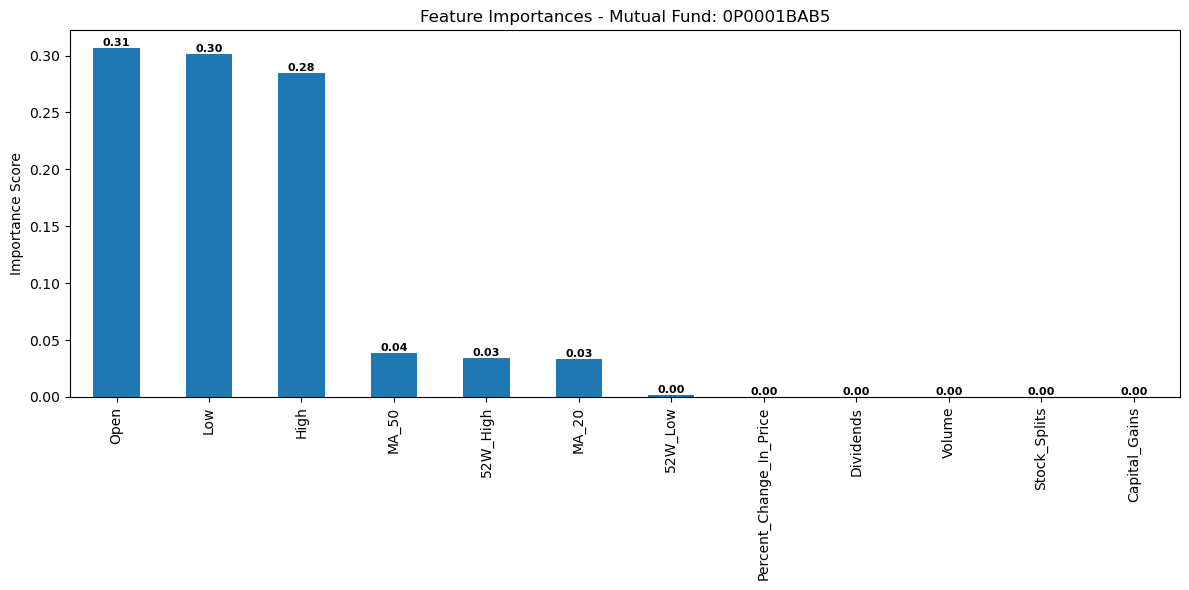


Processing Mutual Fund: 0P0001EI18

Mutual Fund: 0P0001EI18 - Feature Importances:
Open                       0.357339
High                       0.307649
Low                        0.266841
52W_High                   0.037295
MA_20                      0.022403
MA_50                      0.007600
52W_Low                    0.000871
Percent_Change_In_Price    0.000002
Volume                     0.000000
Dividends                  0.000000
Stock_Splits               0.000000
Capital_Gains              0.000000
dtype: float64


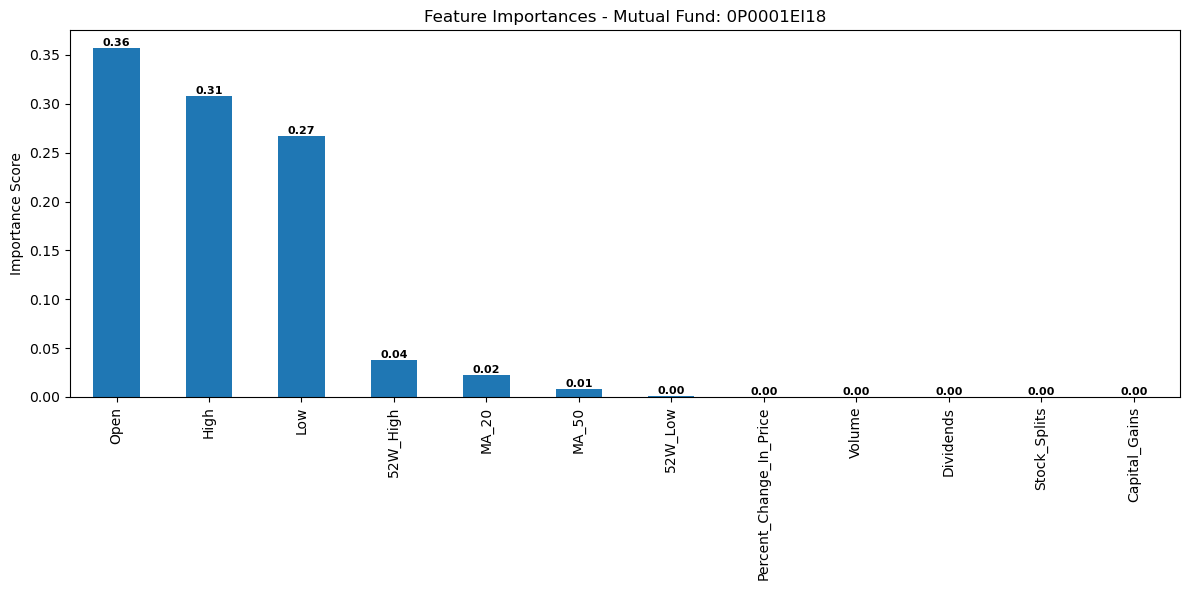


Processing Mutual Fund: 0P0001BA1R

Mutual Fund: 0P0001BA1R - Feature Importances:
Open                       3.240242e-01
Low                        2.852528e-01
High                       2.786133e-01
MA_20                      4.483813e-02
MA_50                      4.381237e-02
52W_High                   2.342002e-02
52W_Low                    3.504618e-05
Percent_Change_In_Price    4.084128e-06
Dividends                  3.031857e-09
Volume                     0.000000e+00
Stock_Splits               0.000000e+00
Capital_Gains              0.000000e+00
dtype: float64


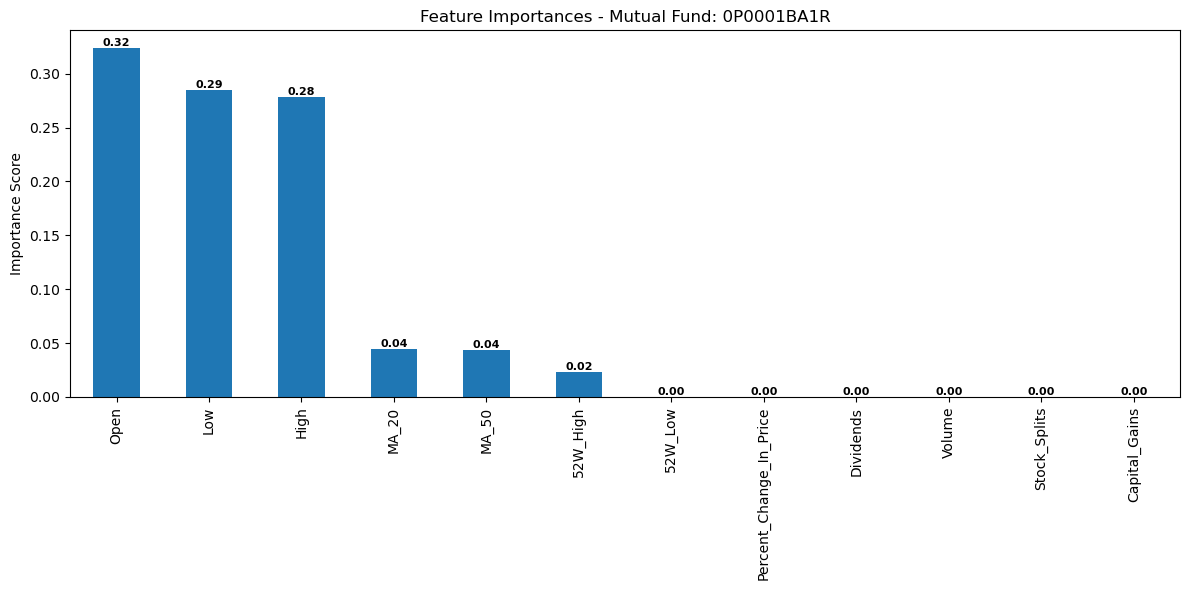


Processing Mutual Fund: 0P00005WEY

Mutual Fund: 0P00005WEY - Feature Importances:
52W_High                   0.220961
High                       0.197407
Low                        0.167755
MA_20                      0.157229
Open                       0.155429
MA_50                      0.093698
52W_Low                    0.007519
Percent_Change_In_Price    0.000003
Volume                     0.000000
Dividends                  0.000000
Stock_Splits               0.000000
Capital_Gains              0.000000
dtype: float64


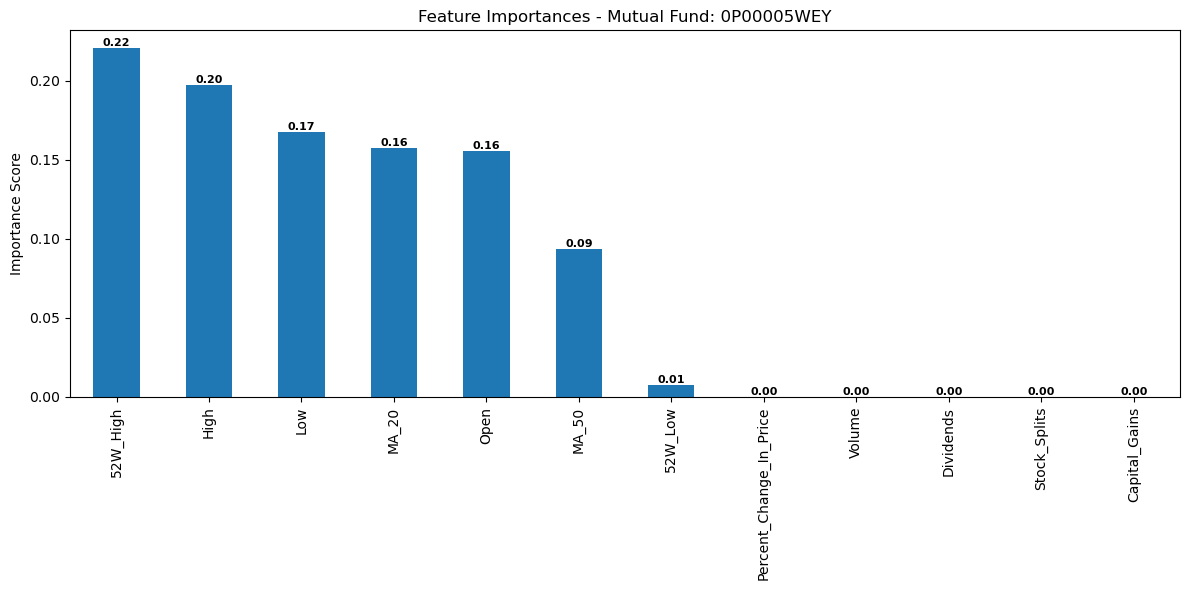


Processing Mutual Fund: 0P0000XUXL

Mutual Fund: 0P0000XUXL - Feature Importances:
52W_High                   0.199691
High                       0.170243
MA_20                      0.158037
Low                        0.147072
Open                       0.126677
MA_50                      0.111759
52W_Low                    0.086519
Percent_Change_In_Price    0.000001
Volume                     0.000000
Dividends                  0.000000
Stock_Splits               0.000000
Capital_Gains              0.000000
dtype: float64


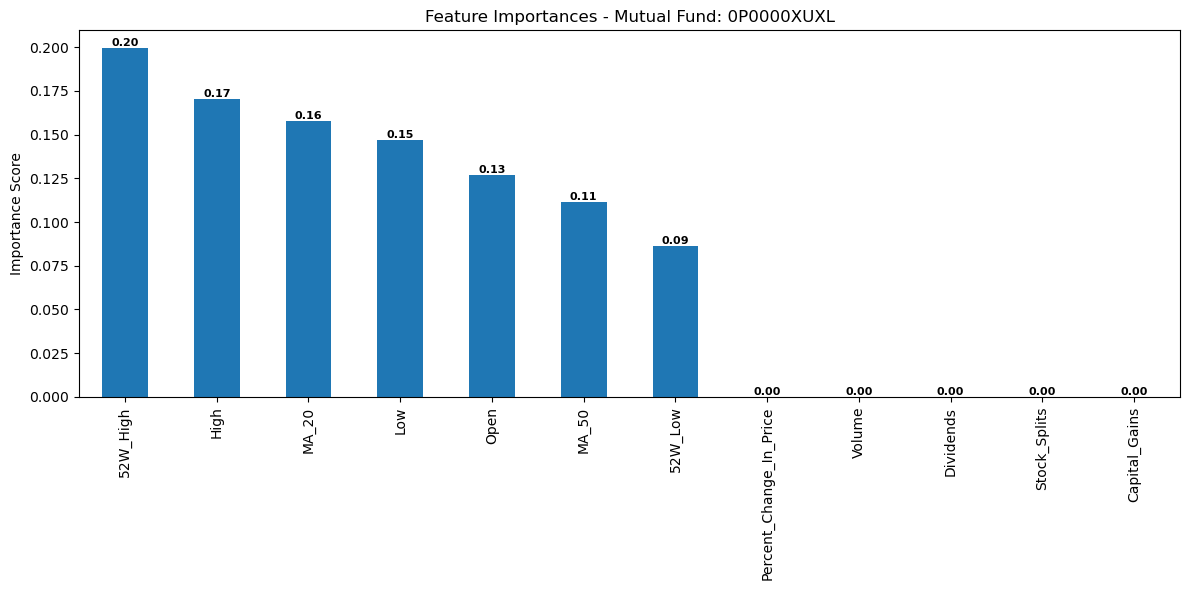


Processing Mutual Fund: 0P0000XUYZ

Mutual Fund: 0P0000XUYZ - Feature Importances:
52W_High                   2.051457e-01
High                       1.599711e-01
MA_20                      1.532486e-01
Low                        1.423966e-01
Open                       1.291867e-01
MA_50                      1.197350e-01
52W_Low                    9.031535e-02
Percent_Change_In_Price    9.355132e-07
Volume                     0.000000e+00
Dividends                  0.000000e+00
Stock_Splits               0.000000e+00
Capital_Gains              0.000000e+00
dtype: float64


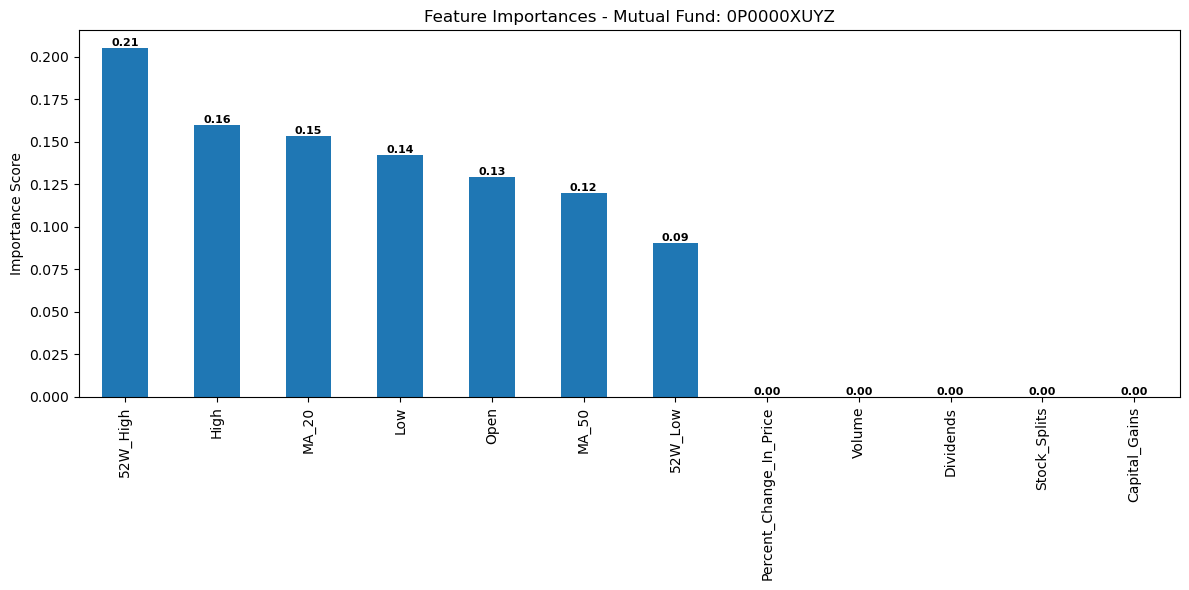


Processing Mutual Fund: 0P0000XW8D

Mutual Fund: 0P0000XW8D - Feature Importances:
High                       0.226446
Open                       0.184863
Low                        0.183540
52W_High                   0.180213
MA_20                      0.128406
MA_50                      0.089082
52W_Low                    0.007450
Percent_Change_In_Price    0.000001
Volume                     0.000000
Dividends                  0.000000
Stock_Splits               0.000000
Capital_Gains              0.000000
dtype: float64


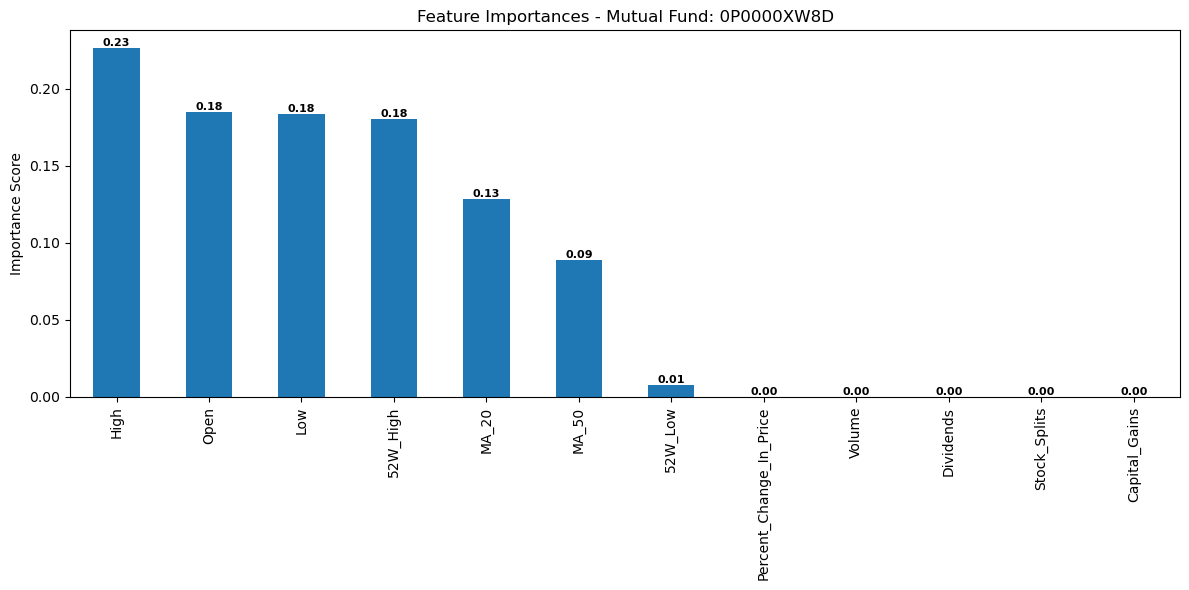


Processing Mutual Fund: 0P0000XVER

Mutual Fund: 0P0000XVER - Feature Importances:
52W_High                   1.919222e-01
MA_20                      1.529568e-01
52W_Low                    1.429184e-01
High                       1.378089e-01
Low                        1.333289e-01
Open                       1.314580e-01
MA_50                      1.096058e-01
Percent_Change_In_Price    9.519432e-07
Volume                     0.000000e+00
Dividends                  0.000000e+00
Stock_Splits               0.000000e+00
Capital_Gains              0.000000e+00
dtype: float64


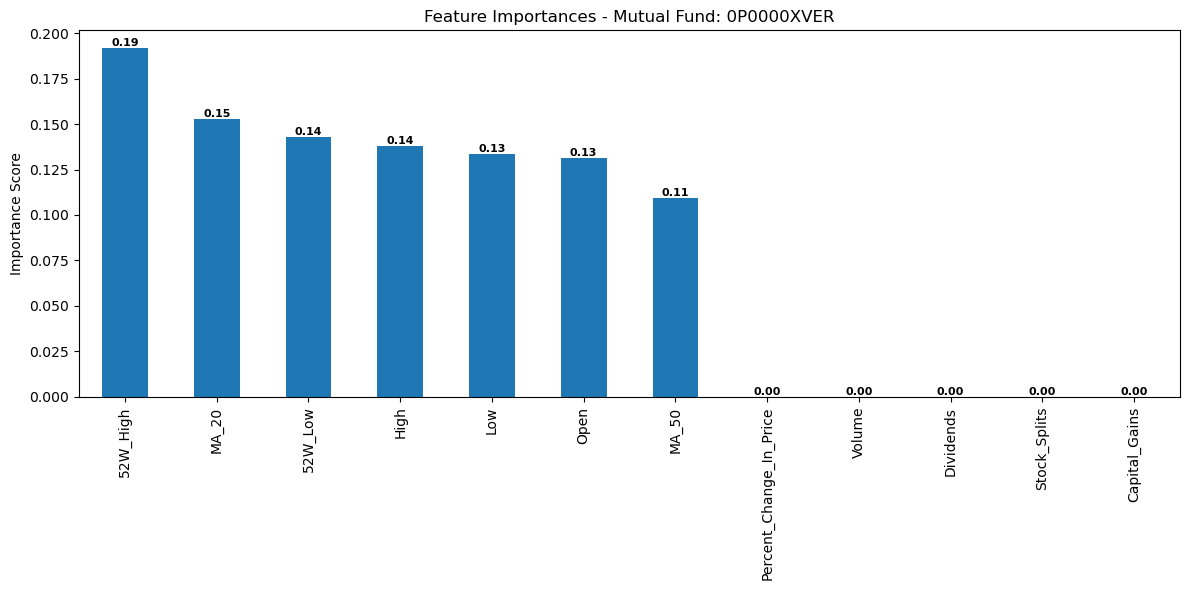


Processing Mutual Fund: 0P0000XUYS

Mutual Fund: 0P0000XUYS - Feature Importances:
High                       2.134348e-01
Low                        2.014157e-01
Open                       1.893808e-01
52W_High                   1.832351e-01
MA_20                      1.320758e-01
MA_50                      8.045276e-02
Percent_Change_In_Price    4.081902e-06
52W_Low                    8.582946e-07
Volume                     0.000000e+00
Dividends                  0.000000e+00
Stock_Splits               0.000000e+00
Capital_Gains              0.000000e+00
dtype: float64


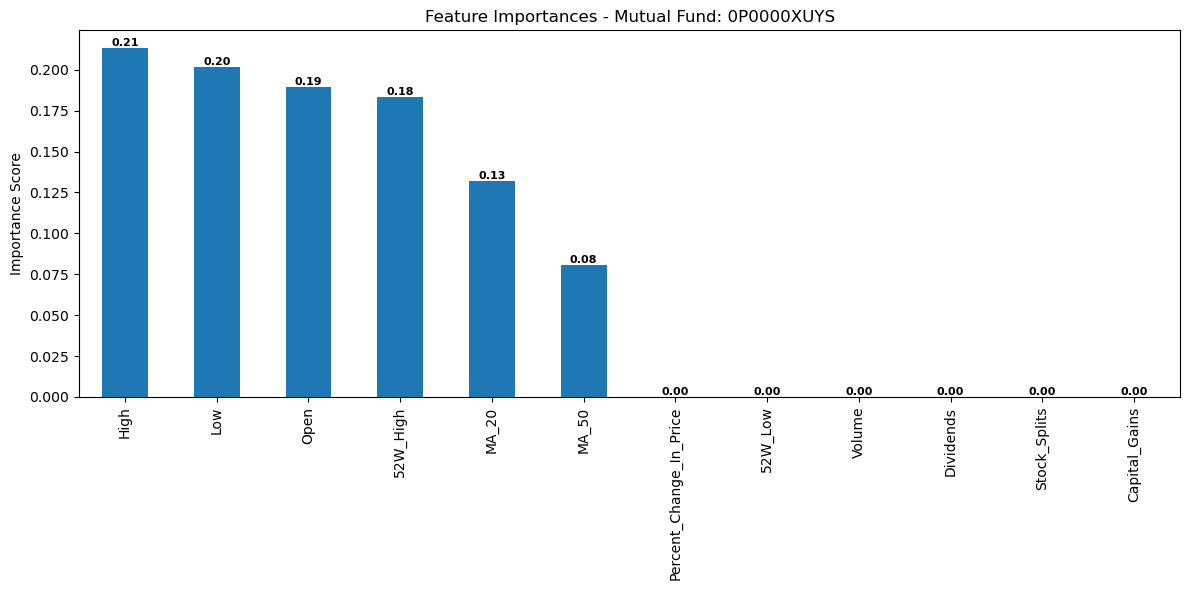


Processing Mutual Fund: 0P0000XW7I

Mutual Fund: 0P0000XW7I - Feature Importances:
Open                       0.362197
High                       0.320001
Low                        0.289869
MA_50                      0.012870
52W_High                   0.010488
MA_20                      0.004563
52W_Low                    0.000007
Percent_Change_In_Price    0.000006
Volume                     0.000000
Dividends                  0.000000
Stock_Splits               0.000000
Capital_Gains              0.000000
dtype: float64


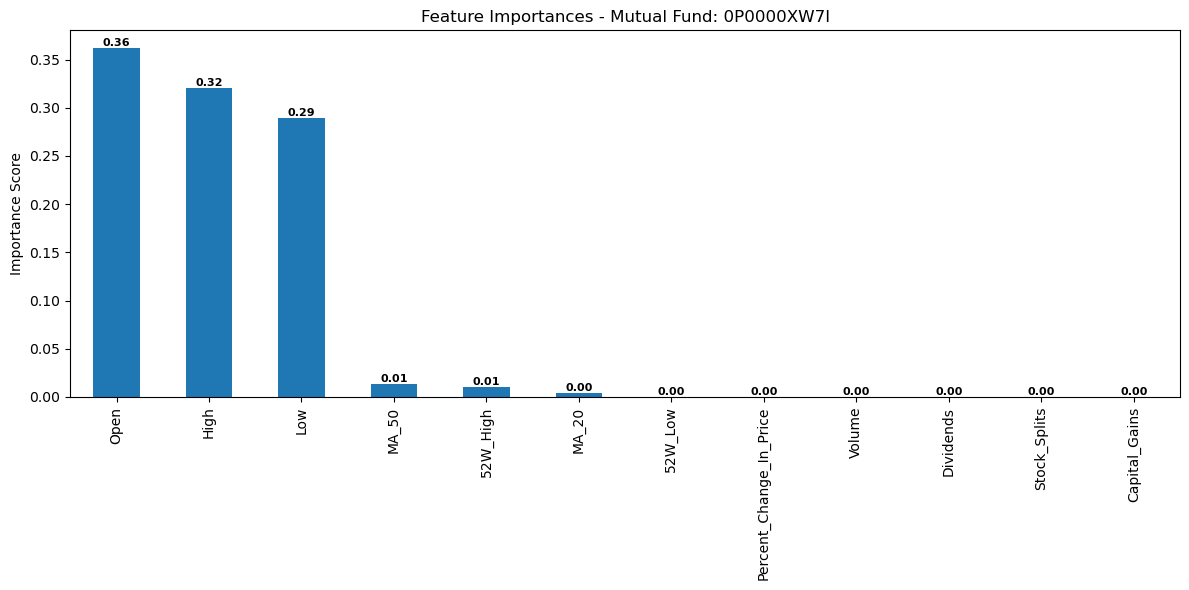


Processing Mutual Fund: 0P0000U3OG

Mutual Fund: 0P0000U3OG - Feature Importances:
Open                       0.355524
High                       0.326154
Low                        0.284247
52W_High                   0.014377
MA_50                      0.012502
MA_20                      0.007189
Percent_Change_In_Price    0.000004
52W_Low                    0.000002
Volume                     0.000000
Dividends                  0.000000
Stock_Splits               0.000000
Capital_Gains              0.000000
dtype: float64


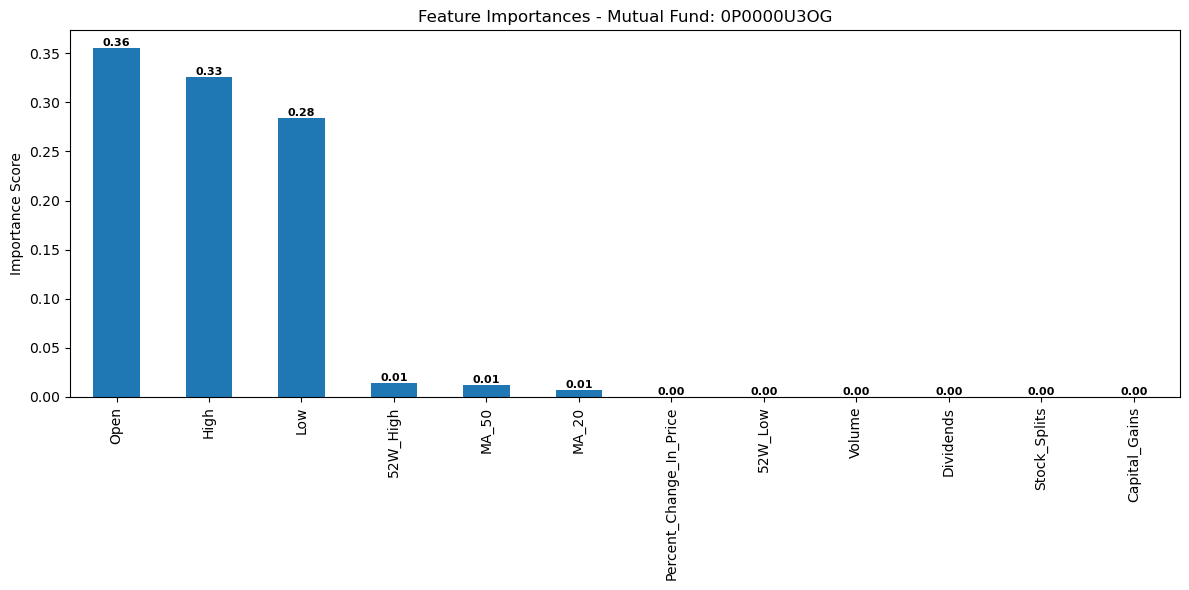


Processing Mutual Fund: SETFGOLD

Mutual Fund: SETFGOLD - Feature Importances:
Low                        0.284646
High                       0.259594
Open                       0.227971
52W_Low                    0.217600
MA_20                      0.009995
MA_50                      0.000165
52W_High                   0.000024
Percent_Change_In_Price    0.000003
Volume                     0.000002
Dividends                  0.000000
Stock_Splits               0.000000
dtype: float64


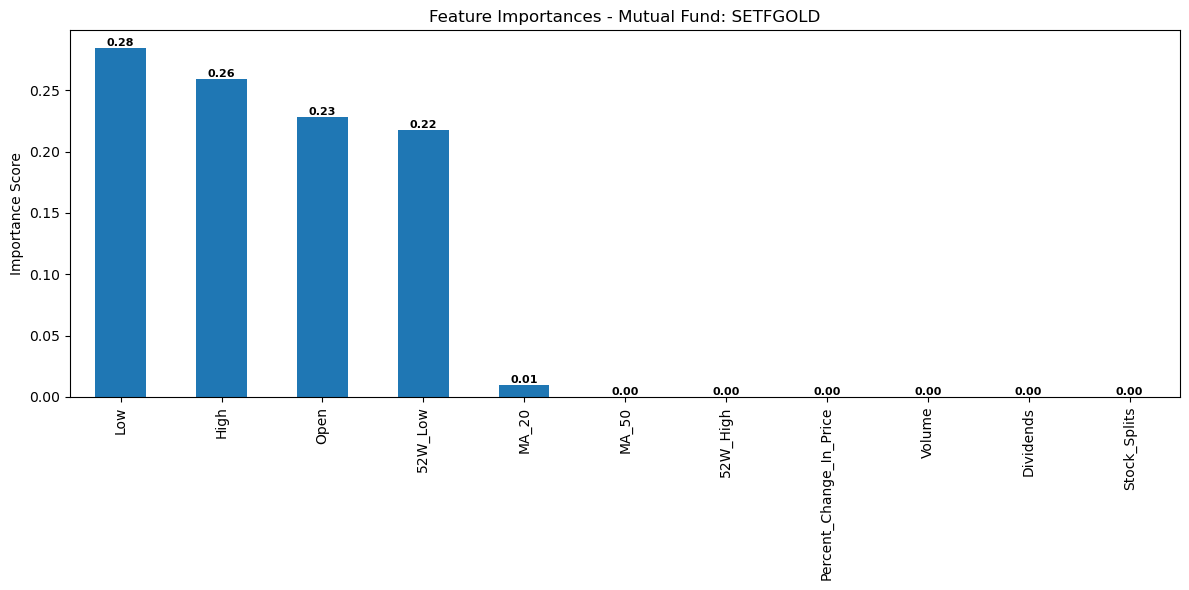


Processing Mutual Fund: BSLGOLDETF

Mutual Fund: BSLGOLDETF - Feature Importances:
Low                        0.317270
Open                       0.250459
High                       0.230705
52W_Low                    0.184483
MA_50                      0.013292
52W_High                   0.003041
MA_20                      0.000672
Percent_Change_In_Price    0.000059
Volume                     0.000019
Dividends                  0.000000
Stock_Splits               0.000000
dtype: float64


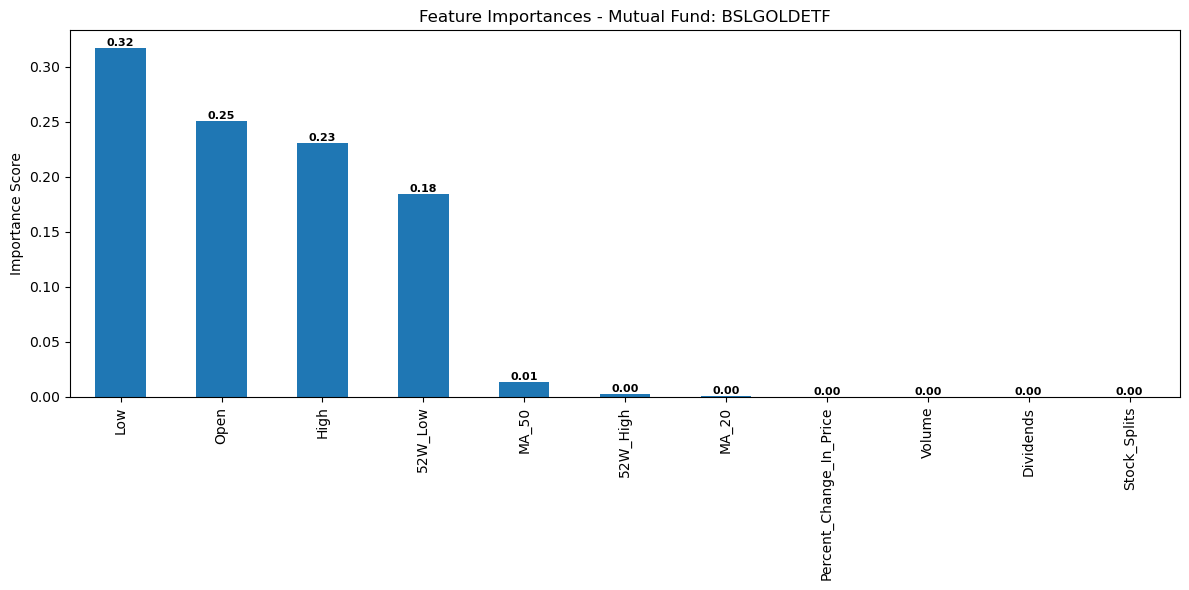

In [6]:
mutual_funds_excel_file = '../Data/Mutual_Funds_Data.xlsx'
all_mutual_funds = pd.read_excel(mutual_funds_excel_file, sheet_name=None)

print("### Feature Selection for Each Mutual Fund ###")
for sheet_name, df in all_mutual_funds.items():
    asset_identifier = f"Mutual Fund: {sheet_name}"
    print(f"\nProcessing {asset_identifier}")
    feat_imp = select_features_rf(df, asset_name=asset_identifier)

### Feature Selection for Gold Bonds

### Feature Selection for Gold Bonds ###

Gold Bonds - Feature Importances:
Ltp                        0.429297
High                       0.253047
Vwap                       0.095557
Open                       0.046682
Low                        0.041563
52W_H                      0.037303
MA_50                      0.029316
52W_High                   0.028014
MA_20                      0.023608
Prev_Close                 0.015268
52W_L                      0.000277
Value                      0.000016
Percent_Change_In_Price    0.000015
Volume                     0.000014
52W_Low                    0.000014
No_Of_Trades               0.000008
dtype: float64


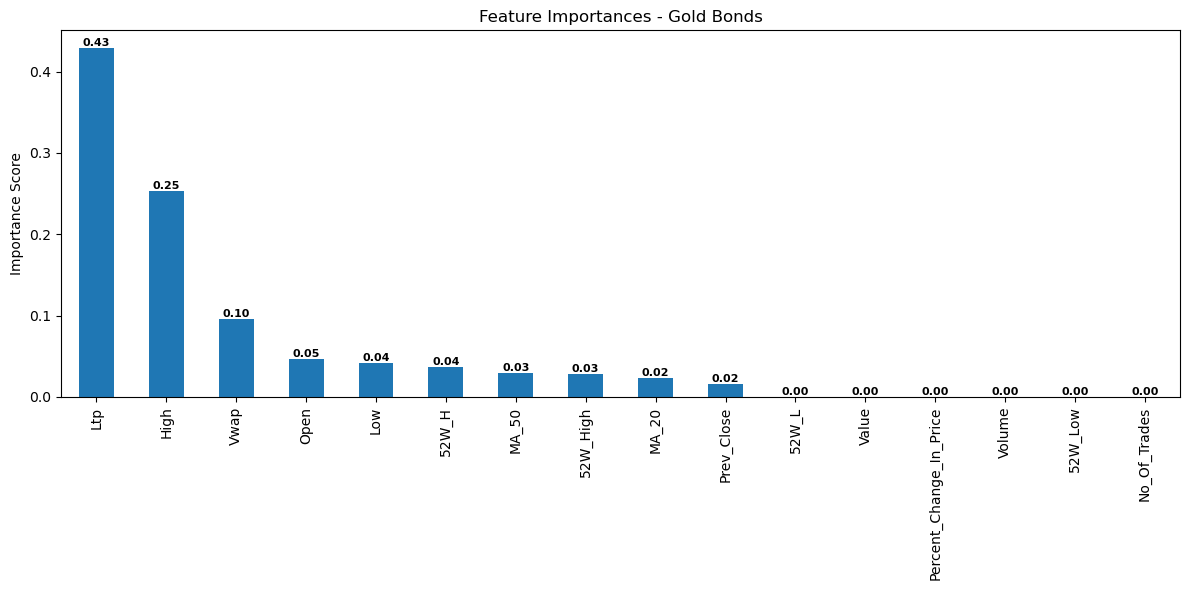

In [7]:
gold_bonds_file = '../Data/Gold_Bond_Data.xlsx'
gold_df = pd.read_excel(gold_bonds_file)

print("### Feature Selection for Gold Bonds ###")
feat_imp_gold = select_features_rf(gold_df, asset_name="Gold Bonds")